# 21CE133 : Krupa Shekhat

## Aim : 
#### You have been hired by a Tanishq for designing a model which classify the image in necklace or ring. The two folders of previously designed jwellery are given to you by the brand. You can use pre-trained model as well for your task. Evaluate your model based on the ML task.

In [1]:
# Import TensorFlow for deep learning.
import tensorflow as tf

# Import Keras, a high-level API for building neural networks.
from tensorflow import keras

# Import layers module for building neural network layers.
from tensorflow.keras import layers

# Import ImageDataGenerator for image data preprocessing.
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Import 'splitfolders' for dataset splitting and list files in the 'Jwellery_Data' directory.
import splitfolders
import os
path = "Jwellery_Data"
print(os.listdir(path))

['necklace', 'ring']


splitfolders.ratio(path,seed=1337, output="tts2", ratio=(0.6, 0.2, 0.2))

In [3]:
train_dir = 'tts2/train' 
val_dir = 'tts2/val'
test_dir = 'tts2/test'
# Set directory paths, configure data augmentation, and create data generators for training, testing and validation images.
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        batch_size=32,
        class_mode='categorical', 
        target_size=(150,150))
        
val_generator = train_datagen.flow_from_directory(
        val_dir,
        batch_size=32,
        class_mode='categorical',
        target_size=(150,150))


test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        class_mode='categorical',
        target_size=(150,150))


Found 293 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


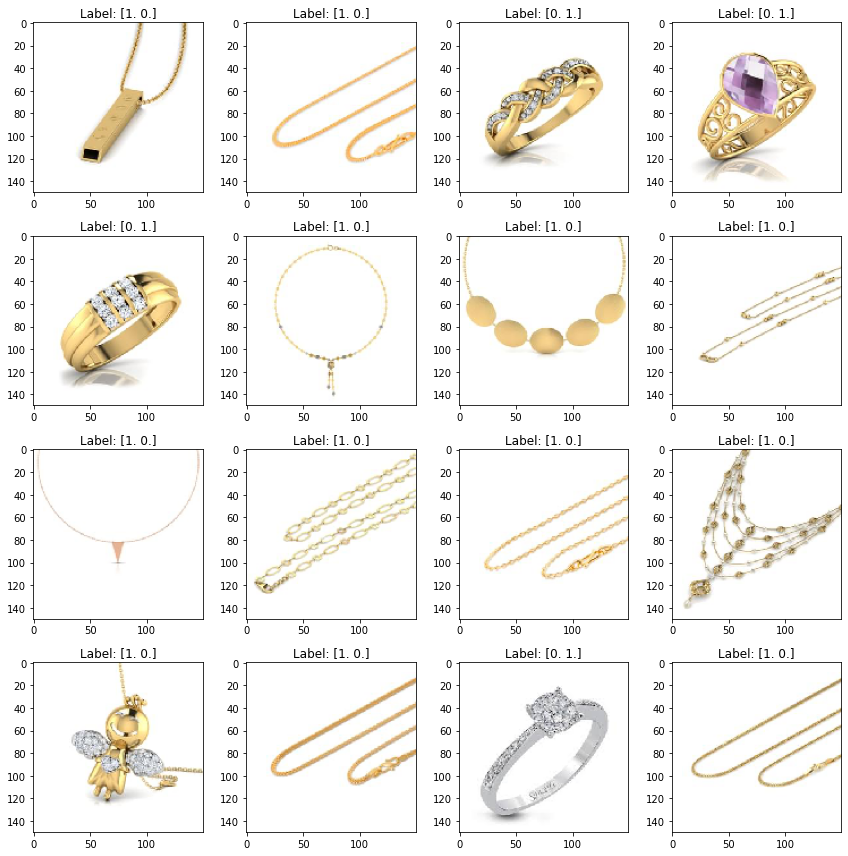

In [4]:
sample_images, sample_labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Visualize sample images from the training data
sample_images, sample_labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i])
    ax.set_title(f"Label: {sample_labels[i]}")
plt.tight_layout()
plt.show()

In [5]:
# Create a Convolutional Neural Network (CNN) model 
#using Keras with convolutional, pooling, flattening, and dense layers, and configure the model for classification.
num_classes = 2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2)) 

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Output layer with num_classes nodes
model.add(Dense(num_classes, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the previously created CNN model using training and validation data for 10 epochs.
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 2.0319 - accuracy: 0.6416 - val_loss: 0.6293 - val_accuracy: 0.6186
Epoch 2/10
10/10 [==============================] - 9s 867ms/step - loss: 0.5029 - accuracy: 0.7884 - val_loss: 0.9168 - val_accuracy: 0.3814
Epoch 3/10
10/10 [==============================] - 10s 1s/step - loss: 0.3804 - accuracy: 0.8089 - val_loss: 0.2332 - val_accuracy: 0.8866
Epoch 4/10
10/10 [==============================] - 8s 814ms/step - loss: 0.1596 - accuracy: 0.9352 - val_loss: 0.1355 - val_accuracy: 0.9485
Epoch 5/10
10/10 [==============================] - 8s 795ms/step - loss: 0.0811 - accuracy: 0.9795 - val_loss: 0.1511 - val_accuracy: 0.9794
Epoch 6/10
10/10 [==============================] - 8s 789ms/step - loss: 0.0929 - accuracy: 0.9693 - val_loss: 0.1980 - val_accuracy: 0.9588
Epoch 7/10
10/10 [==============================] - 8s 801ms/step - loss: 0.0501 - accuracy: 0.9863 - val_loss: 0.1162 - val_accuracy: 0.9691
Epoch 8/10

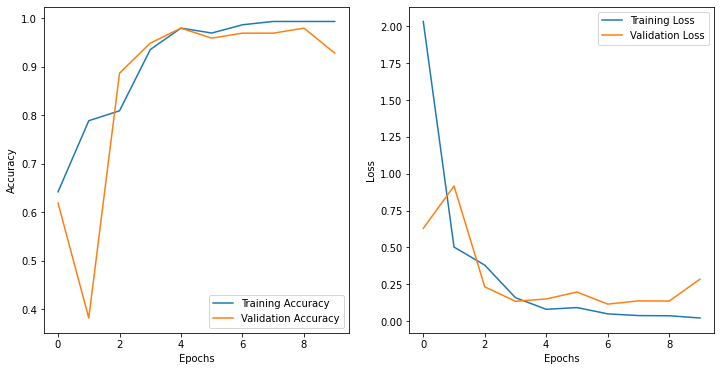

In [7]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


4/4 [==============================] - 1s 133ms/step - loss: 0.1269 - accuracy: 0.9500
Test Accuracy: 0.949999988079071


In [9]:
# Visualize sample images from the training data
sample_images, sample_labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())


# Generate a confusion matrix
test_generator.reset()
y_pred = model.predict(test_generator)
y_true = test_generator.classes
confusion_mtx = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

    

4/4 [==============================] - 1s 126ms/step


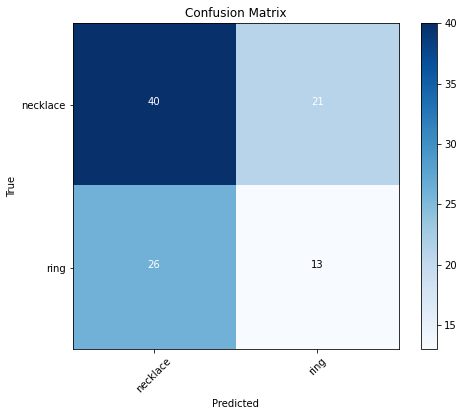

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(confusion_mtx[i, j]), horizontalalignment='center', color='white' if confusion_mtx[i, j] > confusion_mtx.max() / 2 else 'black')
plt.show()

In [11]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

    necklace       0.61      0.66      0.63        61
        ring       0.38      0.33      0.36        39

    accuracy                           0.53       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.52      0.53      0.52       100

